In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


driver = webdriver.Chrome()

# Data Sourcing
There is disagreement between the RAGBRAI website and the wikipedia :(

- https://ragbrai.com/routemaps/past-overnight-towns-grid/
- https://en.wikipedia.org/wiki/List_of_RAGBRAI_overnight_stops

## RAGBRAI.com

In [2]:
from selenium.webdriver.support.ui import WebDriverWait, Select

driver.get("https://ragbrai.com/routemaps/past-overnight-towns-grid/")

# Wait until the dropdown menu is present
dropdown = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.NAME, "tablepress-2_length"))
)
select = Select(dropdown)
select.select_by_visible_text("100")

# Wait until the table is present
table = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.ID, "tablepress-2"))
)
table_html = table.get_attribute('outerHTML')
soup = BeautifulSoup(table_html, 'html.parser')
table = soup.find("table")
headers = [header.text for header in table.find_all('th')]
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cells = row.find_all('td')
    rows.append([cell.text.strip() for cell in cells])

df = pd.DataFrame(rows, columns=headers)
df

,Year,#,Miles,Feet of Climb,Riders,Starting Town,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Ending Town
0,1973,I,412,"12,637",130,Sioux City,Storm Lake,Fort Dodge,Ames,Des Moines,Williamsburg,Davenport,
1,1974,II,422,"12,648","2,000",Council Bluffs,Atlantic,Guthrie Center,Camp Dodge,Marshalltown,Waterloo,Monticello,Dubuque
2,1975,III,450,"12,573","3,000",Hawarden,Cherokee,Lake View,Boone,Newton,Sigourney,Mt. Pleasant,Fort Madison
3,1976,IV,430,"13,737","4,000",Sidney,Red Oak,Harlan,Jefferson,Nevada,Grinnell,Iowa City,Muscatine
4,1977,V,400,"8,479","6,000",Onawa,Ida Grove,Laurens,Algona,Clear Lake,New Hampton,Decorah,Lansing
5,1978,VI,440,"11,238","6,000",Sioux City,Storm Lake,Humboldt,Iowa Falls,Vinton,Mt. Vernon,Maquoketa,Clinton
6,1979,VII,480,"11,836","6,000",Rock Rapids,Spencer,Rockwell City,Story City,Tama,Fairfield,Wapello,Burlington
7,1980,VIII,468,"11,912","6,000",Glenwood,Atlantic,Carroll,Perry,Webster City,Waverly,Elkader,Guttenberg
8,1981,IX,490,"14,372","6,000",Missouri Valley,Mapleton,Lake City,Greenfield,Leon,Centerville,Keosauqua,Keokuk
9,1982,X,523,"10,935","6,000",Akron,Cherokee,Estherville,Forest City,Charles City,Independence,Tipton,Davenport


Add 2024 data and save

In [12]:
year_2024 = {
    "Year": 2024,
    "#": "LI",
    "Miles": 434,
    "Feet of Climb": 18375,
    "Riders": None,  # TBD
    "Starting Town": "Glenwood (8)",
    "Sunday": "Red Oak (5)",
    "Monday": "Atlantic (8)",
    "Tuesday": "Winterset (3)",
    "Wednesday": "Knoxville (4)",
    "Thursday": "Ottumwa (5)",
    "Friday": "Mount Pleasant (6)",
    "Ending Town": "Burlington"
}
# pd.concat([df, year_2024], ignore_index=True)
# df.append(year_2024, ignore_index=True)
year_2024 = pd.DataFrame([year_2024])  # Create a DataFrame for the new row
routes_df = pd.concat([df, year_2024], ignore_index=True)
routes_df.to_csv('../data/past_routes.csv')

In [47]:
orig_df = df.copy()

In [ ]:
# Reset it back to original 
df = orig_df

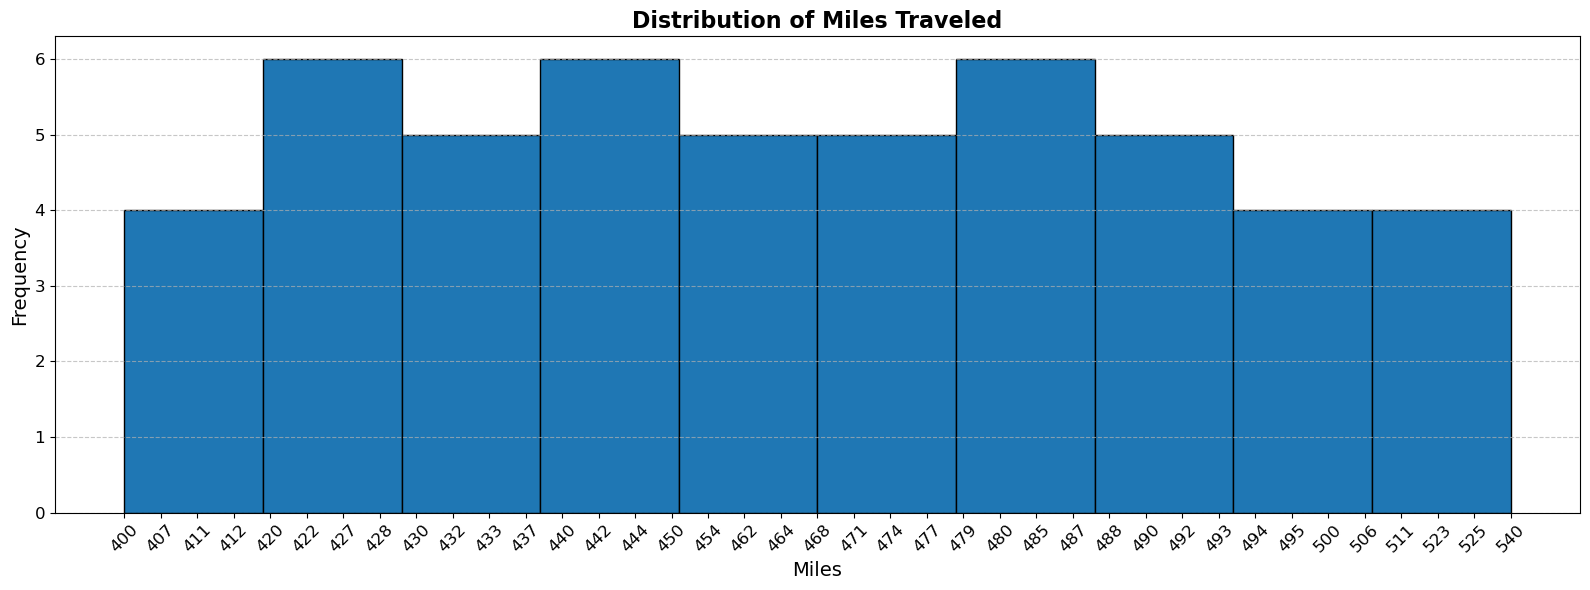

In [92]:
sorted_data = np.sort(df['Miles'])

plt.figure(figsize=(16, 6))
plt.hist(sorted_data, bins=10, edgecolor='black')
plt.title('Distribution of Miles Traveled', fontsize=16, fontweight='bold')
plt.xlabel('Miles', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

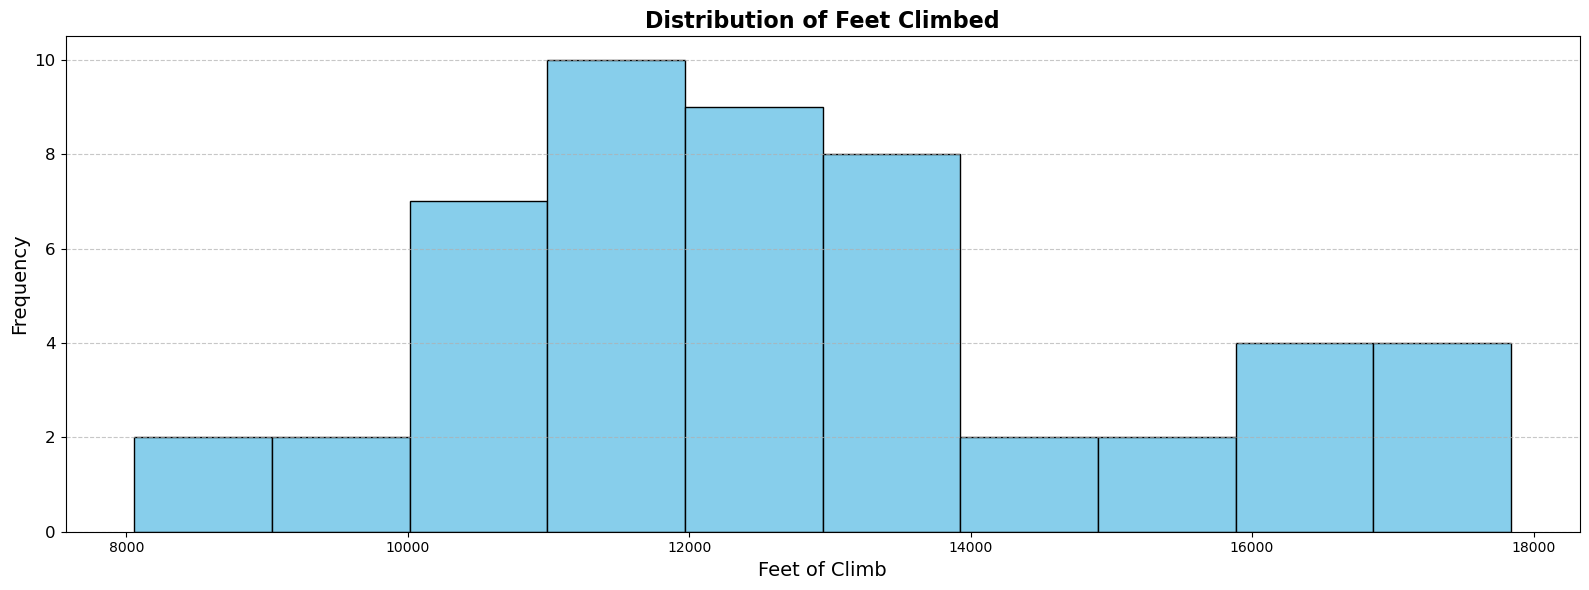

In [90]:
df['Feet of Climb'] = df['Feet of Climb'].str.replace(',', '').astype(int)
sorted_data = np.sort(df['Feet of Climb'])

plt.figure(figsize=(16, 6))
plt.hist(sorted_data,  edgecolor='black')
plt.title('Distribution of Feet Climbed', fontsize=16, fontweight='bold')
plt.xlabel('Feet of Climb', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [54]:
city_cols = ['Starting Town', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Ending Town']
occurrences = {col: {} for col in city_cols}

def count_occurrences(value, col):
    if value in occurrences[col]:
        occurrences[col][value] += 1
    else:
        occurrences[col][value] = 1
    return occurrences[col][value]

for col in city_cols:
    df[col + ' Occurrences'] = df[col].apply(lambda x: count_occurrences(x, col))

df

,Year,#,Miles,Feet of Climb,Riders,Starting Town,Sunday,Monday,Tuesday,Wednesday,...,Friday,Ending Town,Starting Town Occurrences,Sunday Occurrences,Monday Occurrences,Tuesday Occurrences,Wednesday Occurrences,Thursday Occurrences,Friday Occurrences,Ending Town Occurrences
0,1973,I,412,"12,637",130,Sioux City,Storm Lake,Fort Dodge,Ames,Des Moines,...,Davenport,,1,1,1,1,1,1,1,1
1,1974,II,422,"12,648","2,000",Council Bluffs,Atlantic,Guthrie Center,Camp Dodge,Marshalltown,...,Monticello,Dubuque,1,1,1,1,1,1,1,1
2,1975,III,450,"12,573","3,000",Hawarden,Cherokee,Lake View,Boone,Newton,...,Mt. Pleasant,Fort Madison,1,1,1,1,1,1,1,1
3,1976,IV,430,"13,737","4,000",Sidney,Red Oak,Harlan,Jefferson,Nevada,...,Iowa City,Muscatine,1,1,1,1,1,1,1,1
4,1977,V,400,"8,479","6,000",Onawa,Ida Grove,Laurens,Algona,Clear Lake,...,Decorah,Lansing,1,1,1,1,1,1,1,1
5,1978,VI,440,"11,238","6,000",Sioux City,Storm Lake,Humboldt,Iowa Falls,Vinton,...,Maquoketa,Clinton,2,2,1,1,1,1,1,1
6,1979,VII,480,"11,836","6,000",Rock Rapids,Spencer,Rockwell City,Story City,Tama,...,Wapello,Burlington,1,1,1,1,1,1,1,1
7,1980,VIII,468,"11,912","6,000",Glenwood,Atlantic,Carroll,Perry,Webster City,...,Elkader,Guttenberg,1,2,1,1,1,1,1,1
8,1981,IX,490,"14,372","6,000",Missouri Valley,Mapleton,Lake City,Greenfield,Leon,...,Keosauqua,Keokuk,1,1,1,1,1,1,1,1
9,1982,X,523,"10,935","6,000",Akron,Cherokee,Estherville,Forest City,Charles City,...,Tipton,Davenport,1,2,1,1,1,1,1,1


In [55]:
last_seen = {col: {} for col in city_cols}

# Find distance between last occurance 
def calculate_distance(value, col, current_index):
    if value in last_seen[col]:
        distance = current_index - last_seen[col][value]
    else:
        distance = 0
    last_seen[col][value] = current_index
    return distance

# Apply the function to each specified column
for col in city_cols:
    df[col + ' Distance'] = df[col].apply(lambda x, col=col: calculate_distance(x, col, df.index[df[col] == x][0]))

df

,Year,#,Miles,Feet of Climb,Riders,Starting Town,Sunday,Monday,Tuesday,Wednesday,...,Friday Occurrences,Ending Town Occurrences,Starting Town Distance,Sunday Distance,Monday Distance,Tuesday Distance,Wednesday Distance,Thursday Distance,Friday Distance,Ending Town Distance
0,1973,I,412,"12,637",130,Sioux City,Storm Lake,Fort Dodge,Ames,Des Moines,...,1,1,0,0,0,0,0,0,0,0
1,1974,II,422,"12,648","2,000",Council Bluffs,Atlantic,Guthrie Center,Camp Dodge,Marshalltown,...,1,1,0,0,0,0,0,0,0,0
2,1975,III,450,"12,573","3,000",Hawarden,Cherokee,Lake View,Boone,Newton,...,1,1,0,0,0,0,0,0,0,0
3,1976,IV,430,"13,737","4,000",Sidney,Red Oak,Harlan,Jefferson,Nevada,...,1,1,0,0,0,0,0,0,0,0
4,1977,V,400,"8,479","6,000",Onawa,Ida Grove,Laurens,Algona,Clear Lake,...,1,1,0,0,0,0,0,0,0,0
5,1978,VI,440,"11,238","6,000",Sioux City,Storm Lake,Humboldt,Iowa Falls,Vinton,...,1,1,0,0,0,0,0,0,0,0
6,1979,VII,480,"11,836","6,000",Rock Rapids,Spencer,Rockwell City,Story City,Tama,...,1,1,0,0,0,0,0,0,0,0
7,1980,VIII,468,"11,912","6,000",Glenwood,Atlantic,Carroll,Perry,Webster City,...,1,1,0,0,0,0,0,0,0,0
8,1981,IX,490,"14,372","6,000",Missouri Valley,Mapleton,Lake City,Greenfield,Leon,...,1,1,0,0,0,0,0,0,0,0
9,1982,X,523,"10,935","6,000",Akron,Cherokee,Estherville,Forest City,Charles City,...,1,1,0,0,0,0,0,0,0,0


In [56]:
def calculate_distance(row, col):
    value = row[col]
    current_index = row.name
    if value in last_seen[col]:
        distance = current_index - last_seen[col][value]
    else:
        distance = 0
    last_seen[col][value] = current_index
    return distance

# Apply the function to each specified column
for col in city_cols:
    df[col + ' Distance'] = df.apply(calculate_distance, col=col, axis=1)

df

,Year,#,Miles,Feet of Climb,Riders,Starting Town,Sunday,Monday,Tuesday,Wednesday,...,Friday Occurrences,Ending Town Occurrences,Starting Town Distance,Sunday Distance,Monday Distance,Tuesday Distance,Wednesday Distance,Thursday Distance,Friday Distance,Ending Town Distance
0,1973,I,412,"12,637",130,Sioux City,Storm Lake,Fort Dodge,Ames,Des Moines,...,1,1,0,0,0,0,0,0,0,0
1,1974,II,422,"12,648","2,000",Council Bluffs,Atlantic,Guthrie Center,Camp Dodge,Marshalltown,...,1,1,0,0,0,0,0,0,0,0
2,1975,III,450,"12,573","3,000",Hawarden,Cherokee,Lake View,Boone,Newton,...,1,1,0,0,0,0,0,0,0,0
3,1976,IV,430,"13,737","4,000",Sidney,Red Oak,Harlan,Jefferson,Nevada,...,1,1,0,0,0,0,0,0,0,0
4,1977,V,400,"8,479","6,000",Onawa,Ida Grove,Laurens,Algona,Clear Lake,...,1,1,0,0,0,0,0,0,0,0
5,1978,VI,440,"11,238","6,000",Sioux City,Storm Lake,Humboldt,Iowa Falls,Vinton,...,1,1,5,5,0,0,0,0,0,0
6,1979,VII,480,"11,836","6,000",Rock Rapids,Spencer,Rockwell City,Story City,Tama,...,1,1,0,0,0,0,0,0,0,0
7,1980,VIII,468,"11,912","6,000",Glenwood,Atlantic,Carroll,Perry,Webster City,...,1,1,0,6,0,0,0,0,0,0
8,1981,IX,490,"14,372","6,000",Missouri Valley,Mapleton,Lake City,Greenfield,Leon,...,1,1,0,0,0,0,0,0,0,0
9,1982,X,523,"10,935","6,000",Akron,Cherokee,Estherville,Forest City,Charles City,...,1,1,0,7,0,0,0,0,0,0


Median = 8.0


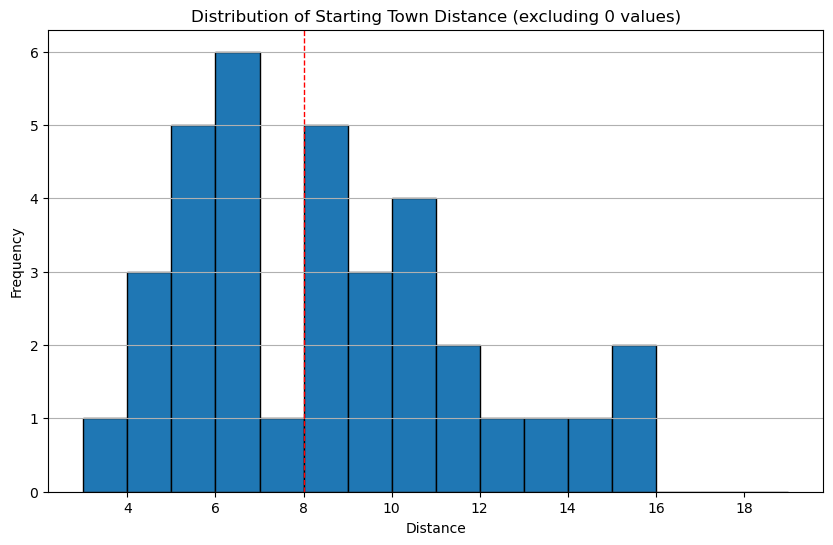

Median = 10.0


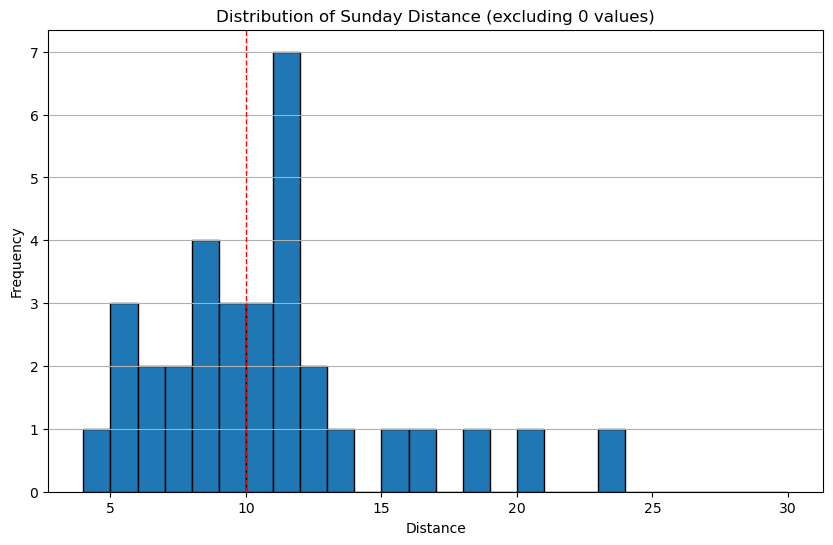

Median = 11.0


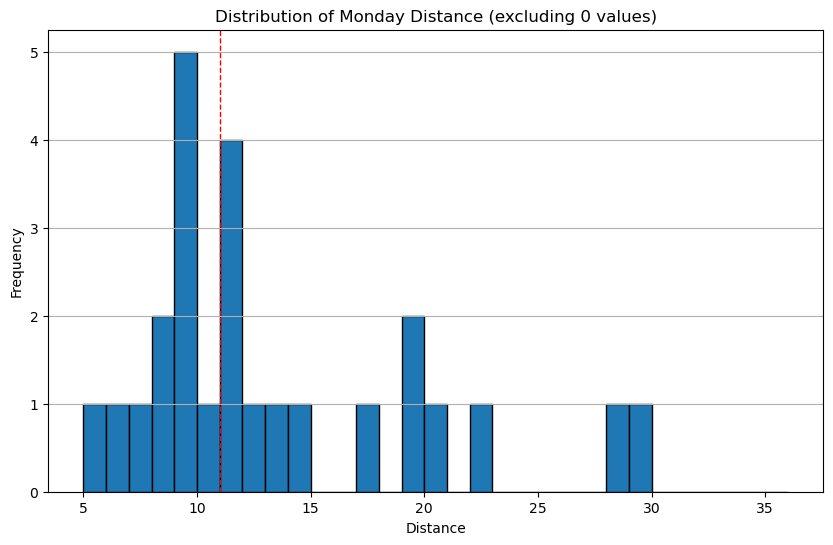

Median = 11.5


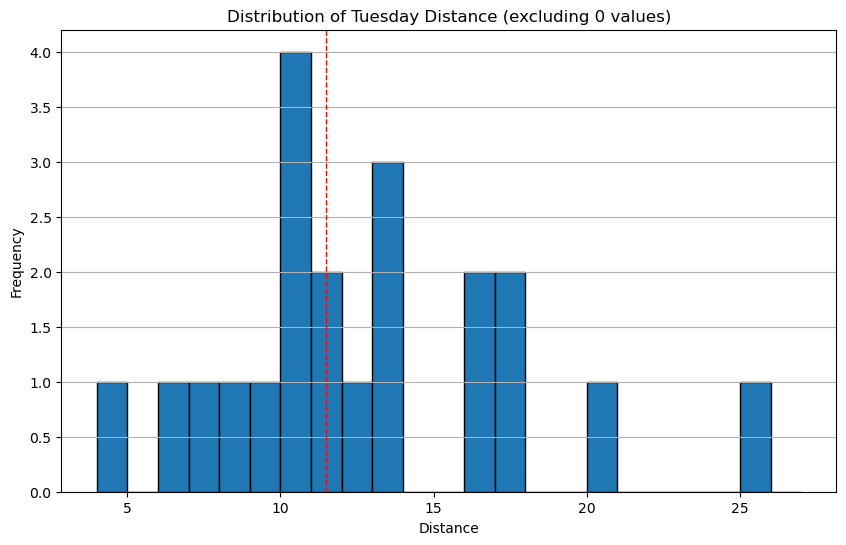

Median = 12.0


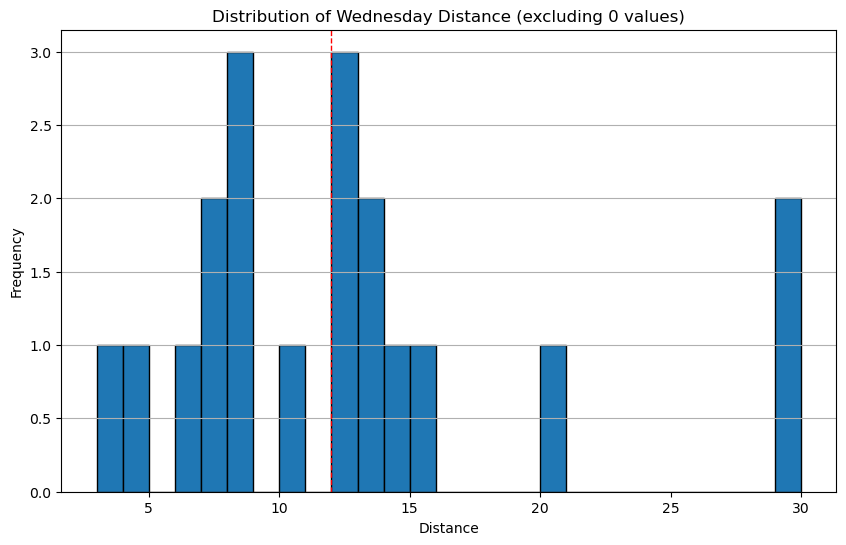

Median = 12.0


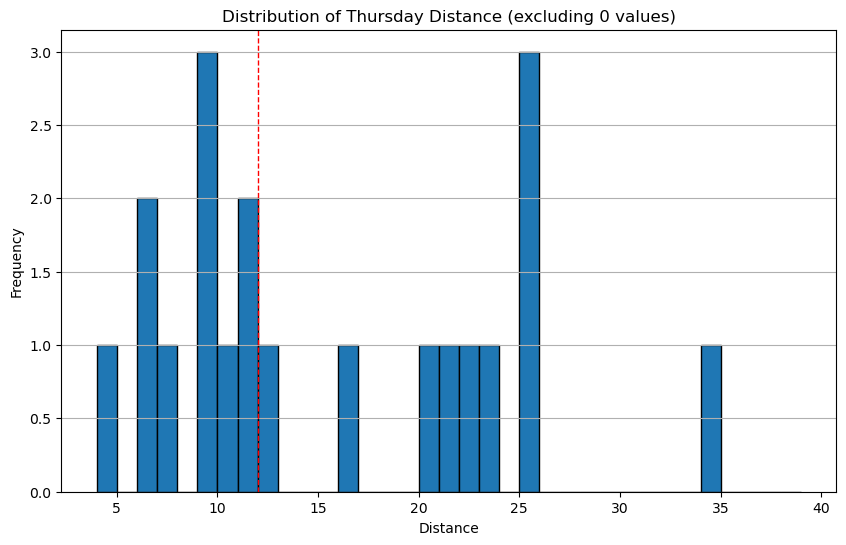

Median = 10.0


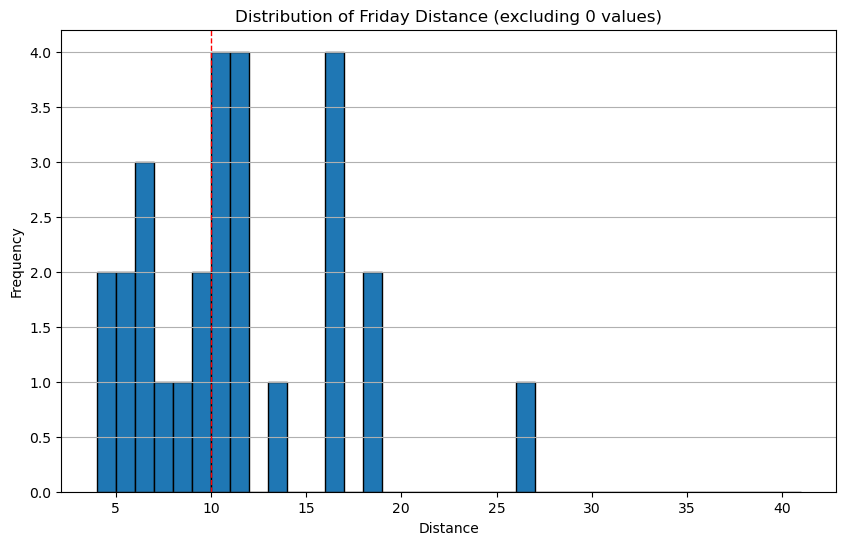

Median = 9.0


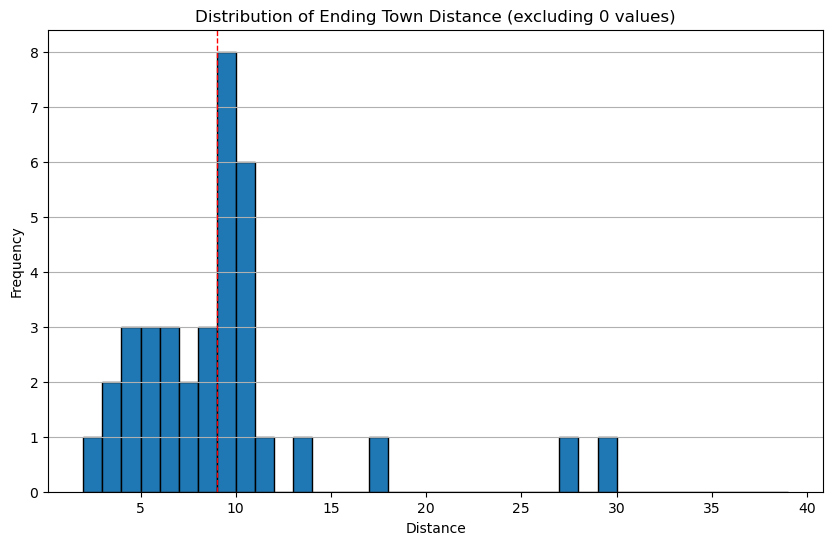

In [72]:
for col in city_cols:
    distance_col = col + ' Distance'
    non_zero_distances = df[df[distance_col] != 0][distance_col]
    plt.figure(figsize=(10, 6))
    # plt.hist(non_zero_distances, bins=range(1, non_zero_distances.max() + 2), edgecolor='black')
    plt.hist(non_zero_distances, bins=range(non_zero_distances.min(), non_zero_distances.max()), edgecolor='black')
    median_distance = non_zero_distances.median()
    plt.axvline(median_distance, color='red', linestyle='dashed', linewidth=1)
    print(f"Median = {median_distance}")
    # plt.text(median_distance, plt.ylim()[1] * 0.9, f'Median: {median_distance}', color='red', ha='center')
    plt.title(f'Distribution of {distance_col} (excluding 0 values)')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

In [75]:
# Number of unique cities per day
for col in city_cols:
    print(df[col].nunique(), col)

14 Starting Town
16 Sunday
24 Monday
28 Tuesday
30 Wednesday
29 Thursday
22 Friday
13 Ending Town


In [106]:
start_frequency = df['Starting Town'].value_counts().reset_index()
start_frequency

,Starting Town,count
0,Sioux City,8
1,Council Bluffs,7
2,Glenwood,7
3,Onawa,6
4,Missouri Valley,4
5,Sioux Center,4
6,Hawarden,3
7,Rock Rapids,3
8,Le Mars,2
9,Sergeant Bluff,2


In [127]:
df[df['Starting Town'] == row[1]].iloc[-1].index

Index(['Year', '#', 'Miles', 'Feet of Climb', 'Riders', 'Starting Town',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Ending Town', 'Starting Town Occurrences', 'Sunday Occurrences',
       'Monday Occurrences', 'Tuesday Occurrences', 'Wednesday Occurrences',
       'Thursday Occurrences', 'Friday Occurrences', 'Ending Town Occurrences',
       'Starting Town Distance', 'Sunday Distance', 'Monday Distance',
       'Tuesday Distance', 'Wednesday Distance', 'Thursday Distance',
       'Friday Distance', 'Ending Town Distance'],
      dtype='object')

In [132]:
last_index = df.index.max()
last_visited_list = []
for row in start_frequency.itertuples():
    last_visited = last_index - df[df['Starting Town'] == row[1]].index.max()
    last_visited_list.append(last_visited)

start_frequency['Last Visited'] = last_visited_list
start_frequency

,Starting Town,count,Last Visited
0,Sioux City,8,0
1,Council Bluffs,7,3
2,Glenwood,7,6
3,Onawa,6,4
4,Missouri Valley,4,14
5,Sioux Center,4,10
6,Hawarden,3,24
7,Rock Rapids,3,15
8,Le Mars,2,2
9,Sergeant Bluff,2,1


In [ ]:
def calculate_distance(row, col):
    value = row[col]
    current_index = row.name
    if value in last_seen[col]:
        distance = current_index - last_seen[col][value]
    else:
        distance = 0
    last_seen[col][value] = current_index
    return distance

# Apply the function to each specified column
for col in city_cols:
    df[col + ' Distance'] = df.apply(calculate_distance, col=col, axis=1)

df

## Wikipedia

In [2]:
driver.get("https://en.wikipedia.org/wiki/List_of_RAGBRAI_overnight_stops")

In [3]:
# Wait until the table is present
WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CLASS_NAME, "wikitable"))
)

# Locate the table element
table = driver.find_element(By.CLASS_NAME, "wikitable")

# Extract the table rows
rows = table.find_elements(By.TAG_NAME, "tr")

# Extract the table headers
headers = [header.text for header in rows[0].find_elements(By.TAG_NAME, "th")]

# Extract the table data
data = []
for row in rows[1:]:
    cells = row.find_elements(By.TAG_NAME, "td")
    data.append([cell.text for cell in cells])

# Create a pandas DataFrame
df = pd.DataFrame(data, columns=headers)

# Close the webdriver
driver.quit()

# Display the DataFrame
print(df)

ValueError: 2 columns passed, passed data had 14 columns

In [11]:
df = pd.DataFrame(data, columns=headers)


ValueError: 13 columns passed, passed data had 14 columns

In [20]:
data[10]

['1982',
 'Jul 25-31',
 'X',
 '523',
 'TBD',
 'Akron (1)',
 'Cherokee (2)',
 'Estherville (1)',
 'Forest City (1)',
 'Charles City (1)',
 'Independence (1)',
 'Tipton (1)',
 'Davenport (2)']

In [19]:
data[-1]

['2024',
 'Jul 20-27',
 'LI',
 '',
 '',
 'Glenwood (8)',
 'Red Oak (5)',
 'Atlantic (8)',
 'Winterset (3)',
 'Knoxville (4)',
 'Ottumwa (5)',
 'Mount Pleasant (6)',
 'Burlington (7)',
 '']

In [16]:
len(data[10])

13

In [17]:
len(headers)

13

In [10]:
table = driver.find_element(By.CLASS_NAME, "wikitable")

# Extract the table rows
rows = table.find_elements(By.TAG_NAME, "tr")

# Extract the table headers
headers = [header.text for header in rows[1].find_elements(By.TAG_NAME, "th")]
headers

['Year',
 'Dates',
 'Num',
 'Miles (a)',
 'Climb (ft)(a)',
 'Starting City',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday']